In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,StandardScaler

In [2]:
df = pd.read_csv('../../Dataset/processedData.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [3]:
training_data_df,test_data_df = train_test_split(df,test_size=0.2,random_state=20)

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [5]:
scaled_training = scaler.fit_transform(training_data_df)
scaled_testing = scaler.transform(test_data_df)

In [10]:
print("Values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[6], scaler.min_[6]))

Values were scaled by multiplying by 0.0000159621 and adding -0.017907


In [6]:
training_data_df = pd.DataFrame(scaled_training, columns=training_data_df.columns.values)
test_data_df = pd.DataFrame(scaled_testing, columns=test_data_df.columns.values)

In [7]:
X = training_data_df.drop('charges', axis=1).values
Y = training_data_df[['charges']].values

In [8]:
model = Sequential()
model.add(Dense(50, input_dim=6, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [11]:
modelHistory = model.fit(
    X,
    Y,
    epochs=50,
    shuffle=True,
    verbose=2
)

Epoch 1/50
34/34 - 1s - loss: 0.0037 - 1s/epoch - 37ms/step
Epoch 2/50
34/34 - 0s - loss: 0.0038 - 234ms/epoch - 7ms/step
Epoch 3/50
34/34 - 0s - loss: 0.0039 - 213ms/epoch - 6ms/step
Epoch 4/50
34/34 - 0s - loss: 0.0038 - 238ms/epoch - 7ms/step
Epoch 5/50
34/34 - 0s - loss: 0.0037 - 306ms/epoch - 9ms/step
Epoch 6/50
34/34 - 0s - loss: 0.0037 - 220ms/epoch - 6ms/step
Epoch 7/50
34/34 - 0s - loss: 0.0040 - 241ms/epoch - 7ms/step
Epoch 8/50
34/34 - 0s - loss: 0.0041 - 273ms/epoch - 8ms/step
Epoch 9/50
34/34 - 0s - loss: 0.0039 - 205ms/epoch - 6ms/step
Epoch 10/50
34/34 - 0s - loss: 0.0036 - 133ms/epoch - 4ms/step
Epoch 11/50
34/34 - 0s - loss: 0.0037 - 109ms/epoch - 3ms/step
Epoch 12/50
34/34 - 0s - loss: 0.0036 - 123ms/epoch - 4ms/step
Epoch 13/50
34/34 - 0s - loss: 0.0036 - 114ms/epoch - 3ms/step
Epoch 14/50
34/34 - 0s - loss: 0.0036 - 111ms/epoch - 3ms/step
Epoch 15/50
34/34 - 0s - loss: 0.0037 - 109ms/epoch - 3ms/step
Epoch 16/50
34/34 - 0s - loss: 0.0036 - 109ms/epoch - 3ms/step
Epo

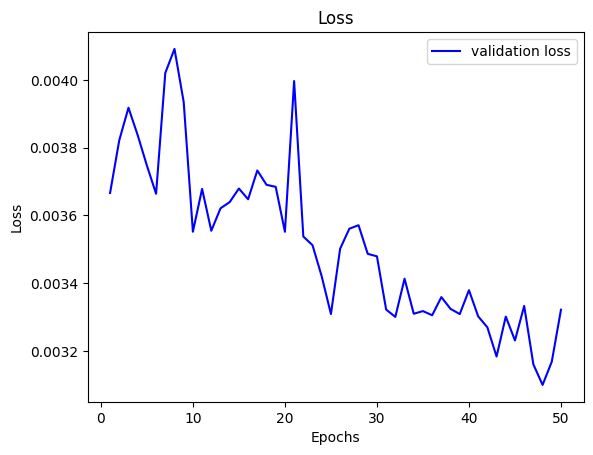

In [22]:
loss_val = modelHistory.history['loss']
epochs = range(1,51)
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
X_test = test_data_df.drop('charges', axis=1).values
Y_test = test_data_df[['charges']].values

In [16]:
test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))

The mean squared error (MSE) for the test data set is: 0.0049681151285767555


In [17]:
prediction = model.predict(np.array([0.000000,1.0,0.292605, 0.6,	1.0,	0.666667]).reshape(1,6))[0]
prediction

1/1 [==============================] - 2s 2s/step


array([0.27826622], dtype=float32)

In [18]:
prediction = prediction + 0.017907
prediction = prediction/0.0000159621
prediction

array([18554.777], dtype=float32)

In [19]:
# Predict test value

dummy = 0
arr = np.array([19,1,27.9,0,1,3])
arr =  np.insert(arr, 6, dummy)
testval = pd.DataFrame((arr).reshape(1,7))
testval = scaler.transform(testval)
testval = np.delete(testval,-1)
pred = model.predict(testval.reshape(1,6))
pred = pred + 0.017907
pred = pred/0.0000159621
pred

c:\Users\sneha\OneDrive\Desktop\Predict-health-insurance-amount\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step


array([[19645.166]], dtype=float32)

In [21]:
import pickle
with open('../../dnn_model.pkl', 'wb') as file:
    pickle.dump(model, file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-12-11 00:30:15         2236
metadata.json                                  2022-12-11 00:30:15           64
variables.h5                                   2022-12-11 00:30:15       151008
